In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.info()
df["Gender"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Female    112
Male       88
Name: Gender, dtype: int64

In [22]:
#one hot labelencoder
from sklearn.preprocessing import LabelEncoder
cat_features=["Gender"]
for col in cat_features:
    lbl=LabelEncoder()
    df[col]=lbl.fit_transform(df[col].values)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [23]:
df=df.drop(columns="CustomerID")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [29]:
df["ratio"]=df["Spending Score (1-100)"]/df["Annual Income (k$)"]
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),ratio
0,1,19,15,39,2.600000
1,1,21,15,81,5.400000
2,0,20,16,6,0.375000
3,0,23,16,77,4.812500
4,0,31,17,40,2.352941


In [44]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
X=df.drop(columns="Spending Score (1-100)")
y=df["Spending Score (1-100)"]
X.head()

,Gender,Age,Annual Income (k$),ratio
0,1,19,15,2.600000
1,1,21,15,5.400000
2,0,20,16,0.375000
3,0,23,16,4.812500
4,0,31,17,2.352941


In [45]:
from sklearn.preprocessing import StandardScaler

num_features = ['Age', 'Annual Income (k$)']

for col in num_features:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1, 1))
    
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Gender,Age,Annual Income (k$),ratio
0,1,-1.424569,-1.738999,2.600000
1,1,-1.281035,-1.738999,5.400000
2,0,-1.352802,-1.700830,0.375000
3,0,-1.137502,-1.700830,4.812500
4,0,-0.563369,-1.662660,2.352941


In [54]:
from sklearn.decomposition import PCA

pca = PCA()

X_pca = pca.fit_transform(X)
X_pca

array([[ 2.63233895e+00, -3.97580121e-01,  3.81942130e-01,
         6.92325640e-01],
       [ 4.52426961e+00, -2.98007730e-01, -1.68239328e+00,
         5.93306334e-01],
       [ 1.07580355e+00, -3.50177783e-01,  2.01521996e+00,
        -2.37505784e-01],
       [ 4.07838352e+00, -2.02993446e-01, -1.25222415e+00,
        -3.93773892e-01],
       [ 2.15038866e+00,  3.01697107e-01,  2.99052816e-01,
        -3.47095467e-01],
       [ 3.84200783e+00, -2.81114751e-01, -1.00448660e+00,
        -3.81096213e-01],
       [ 6.26671703e-01,  5.51948752e-01,  1.63173673e+00,
        -2.99195606e-01],
       [ 4.31429692e+00, -2.44041535e-01, -1.59286143e+00,
        -4.11831509e-01],
       [-2.73561166e-01,  2.36730915e+00,  9.44971571e-01,
         5.87467563e-01],
       [ 3.12310194e+00,  1.88646027e-01, -7.56117146e-01,
        -3.94723204e-01],
       [ 5.34746226e-02,  2.54981750e+00,  4.54726569e-01,
         5.56933825e-01],
       [ 3.98445212e+00,  4.88650766e-01, -1.90149986e+00,
      

In [55]:

print("AAAAAAAAAAA")
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=0)

params = {
    'silent': 1,
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.1,
    'tree_method': 'exact',
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'predictor': 'cpu_predictor'
}

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test,label=y_test)
model=xgb.train(dtrain=dtrain,params=params,num_boost_round=1000,early_stopping_rounds=5,evals=[(dtest,"test")])
                                                                                                

AAAAAAAAAAA
[0]	test-rmse:53.5242
Will train until test-rmse hasn't improved in 5 rounds.
[1]	test-rmse:48.8101
[2]	test-rmse:44.3505
[3]	test-rmse:40.5841
[4]	test-rmse:37.0352
[5]	test-rmse:34.0103
[6]	test-rmse:31.1281
[7]	test-rmse:28.594
[8]	test-rmse:26.5129
[9]	test-rmse:24.4744
[10]	test-rmse:22.6914
[11]	test-rmse:21.0289
[12]	test-rmse:19.4839
[13]	test-rmse:18.089
[14]	test-rmse:16.8322
[15]	test-rmse:15.8018
[16]	test-rmse:14.952
[17]	test-rmse:14.1358
[18]	test-rmse:13.3487
[19]	test-rmse:12.6579
[20]	test-rmse:12.0802
[21]	test-rmse:11.5335
[22]	test-rmse:11.1273
[23]	test-rmse:10.7807
[24]	test-rmse:10.3893
[25]	test-rmse:10.0502
[26]	test-rmse:9.79586
[27]	test-rmse:9.55268
[28]	test-rmse:9.30275
[29]	test-rmse:9.06814
[30]	test-rmse:8.89693
[31]	test-rmse:8.75633
[32]	test-rmse:8.61626
[33]	test-rmse:8.48462
[34]	test-rmse:8.38718
[35]	test-rmse:8.24783
[36]	test-rmse:8.14999
[37]	test-rmse:8.06659
[38]	test-rmse:7.98667
[39]	test-rmse:7.92276
[40]	test-rmse:7.84897
[4

In [56]:
gridsearch_params = [
    (max_depth, eta)
    for max_depth in [6, 7, 8]
    for eta in [0.1, 0.05, 0.01]
]
gridsearch_params

[(6, 0.1),
 (6, 0.05),
 (6, 0.01),
 (7, 0.1),
 (7, 0.05),
 (7, 0.01),
 (8, 0.1),
 (8, 0.05),
 (8, 0.01)]

In [57]:
cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=10,
        seed=0,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=5
    )
cv_results

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,50.349098,2.220696,50.146539,0.540766
1,45.949281,2.031049,45.522524,0.478645
2,42.061127,1.897565,41.365139,0.417467
3,38.475265,1.651646,37.594873,0.372459
4,35.259226,1.511379,34.184330,0.340623
5,32.410750,1.463571,31.112442,0.318203
6,29.913447,1.320614,28.344048,0.291584
7,27.662579,1.222543,25.838380,0.259124
8,25.694109,1.329213,23.566033,0.239633
9,23.785859,1.240015,21.522305,0.212170


In [58]:
min_rmse=float("Inf")
best_param=[]
for max_depth,eta in gridsearch_params:
    print("max_depth={},eta={}".format(max_depth,eta))
    params["max_depth"]=max_depth
    params["eta"]=eta
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=1000,
        seed=0,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=5
    )
    mean_rmse=cv_results["test-rmse-mean"].min()
    boost_rounds=cv_results["test-rmse-mean"].argmin()
    print("RMSE {} for {} rounds".format(mean_rmse,boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse=mean_rmse
        best_param=(max_depth,eta)
print("best_param {}, rmse {}".format(best_param,min_rmse))

max_depth=6,eta=0.1


C:\Users\趙友\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


RMSE 9.8282814 for 178 rounds
max_depth=6,eta=0.05
RMSE 10.0347534 for 282 rounds
max_depth=6,eta=0.01
RMSE 10.406430599999998 for 978 rounds
max_depth=7,eta=0.1
RMSE 9.9841558 for 131 rounds
max_depth=7,eta=0.05
RMSE 10.1991214 for 160 rounds
max_depth=7,eta=0.01
RMSE 10.5600506 for 999 rounds
max_depth=8,eta=0.1
RMSE 10.027218399999999 for 155 rounds
max_depth=8,eta=0.05
RMSE 10.315453199999999 for 186 rounds
max_depth=8,eta=0.01
RMSE 10.5808216 for 999 rounds
best_param (6, 0.1), rmse 9.8282814


In [59]:
params["eta"]=0.1
model=xgb.train(dtrain=dtrain,params=params,num_boost_round=1000,early_stopping_rounds=8,evals=[(dtest,"test")])

[0]	test-rmse:53.5242
Will train until test-rmse hasn't improved in 8 rounds.
[1]	test-rmse:48.8101
[2]	test-rmse:44.3505
[3]	test-rmse:40.5841
[4]	test-rmse:37.0352
[5]	test-rmse:34.0103
[6]	test-rmse:31.1281
[7]	test-rmse:28.589
[8]	test-rmse:26.3884
[9]	test-rmse:24.3282
[10]	test-rmse:22.5452
[11]	test-rmse:20.9381
[12]	test-rmse:19.4324
[13]	test-rmse:18.044
[14]	test-rmse:16.8968
[15]	test-rmse:15.8514
[16]	test-rmse:14.8682
[17]	test-rmse:14.0483
[18]	test-rmse:13.2663
[19]	test-rmse:12.5159
[20]	test-rmse:11.9164
[21]	test-rmse:11.4463
[22]	test-rmse:10.9535
[23]	test-rmse:10.5229
[24]	test-rmse:10.1174
[25]	test-rmse:9.74524
[26]	test-rmse:9.46651
[27]	test-rmse:9.23988
[28]	test-rmse:9.0664
[29]	test-rmse:8.84167
[30]	test-rmse:8.68586
[31]	test-rmse:8.58118
[32]	test-rmse:8.46097
[33]	test-rmse:8.34233
[34]	test-rmse:8.24228
[35]	test-rmse:8.15559
[36]	test-rmse:8.06929
[37]	test-rmse:7.99351
[38]	test-rmse:7.91012
[39]	test-rmse:7.83393
[40]	test-rmse:7.7806
[41]	test-rmse:

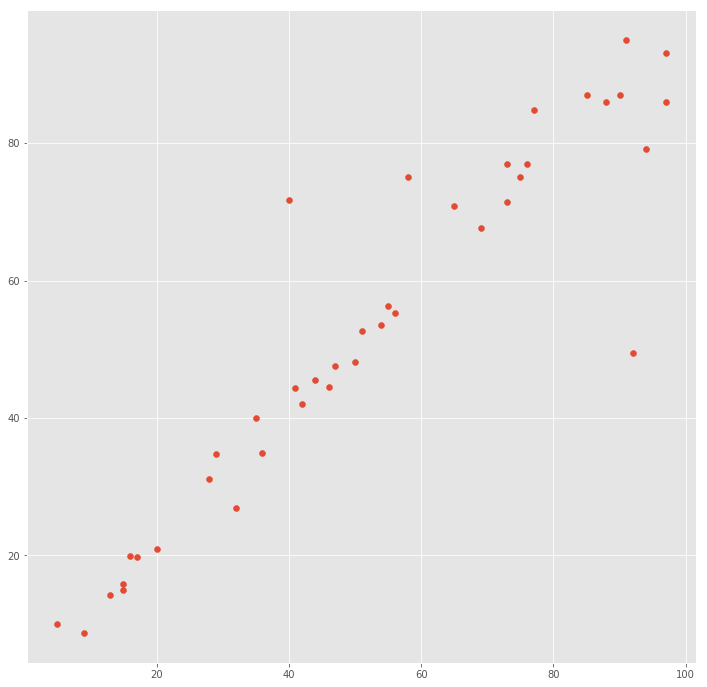

In [51]:
prediction=model.predict(xgb.DMatrix(X_test),ntree_limit=model.best_ntree_limit)
plt.figure(figsize=(12,12))
plt.scatter(y_test,prediction)

In [60]:
print(y_test[0:100],prediction[0:100])

18     29
170    13
107    46
98     42
177    69
182    15
5      76
146    36
12     15
152    20
61     55
125    77
180    32
154    16
80     51
7      94
33     92
130     9
37     73
74     47
183    88
145    97
45     65
159    73
60     56
123    91
179    90
185    97
122    58
44     28
16     35
55     41
150    17
111    54
22      5
189    85
129    75
4      40
83     44
106    50
Name: Spending Score (1-100), dtype: int64 [34.741364  14.204223  44.54188   42.072483  67.60613   15.00126
 77.00199   34.919777  15.862026  20.93663   56.23583   84.89127
 26.929512  19.941124  52.677032  79.13624   49.38872    8.688806
 71.48622   47.52098   85.957825  93.07131   70.84744   76.9617
 55.269836  94.98483   86.941376  85.949814  75.11218   31.146442
 40.020515  44.39691   19.794575  53.504143  10.0016775 86.94871
 75.12866   71.6986    45.53611   48.178417 ]


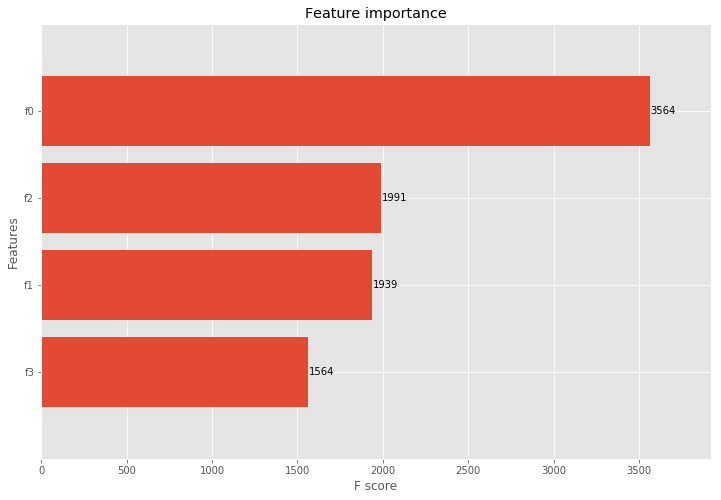

In [61]:
fig,ax=plt.subplots(figsize=(12,8))
xgb.plot_importance(model,max_num_features=12,height=0.8,ax=ax)
plt.show()